# Data Analysis

Loading in human `json` data.

In [3]:
import pandas as pd

df = pd.read_json('data_log.json', lines=True)

df.head()

,game_id,turn,squish/save data
0,b88fbc05-04ba-4662-95f2-a350d1d0214e,0,"{'mode': 1, 'total_reward': 0, 'zombies_squish..."
1,b88fbc05-04ba-4662-95f2-a350d1d0214e,1,"{'mode': 1, 'total_reward': 6, 'zombies_squish..."
2,b88fbc05-04ba-4662-95f2-a350d1d0214e,2,"{'mode': 1, 'total_reward': 6, 'zombies_squish..."
3,b88fbc05-04ba-4662-95f2-a350d1d0214e,3,"{'mode': 1, 'total_reward': 6, 'zombies_squish..."
4,b88fbc05-04ba-4662-95f2-a350d1d0214e,4,"{'mode': 1, 'total_reward': 6, 'zombies_squish..."


## Getting Human Game Data

Getting data for every game played

(find row # of last row for each unique id, store in dict)

In [4]:
games = {}

for i, game_id in enumerate(df['game_id']):
    games[game_id] = i
    
games

{'b88fbc05-04ba-4662-95f2-a350d1d0214e': 54,
 'fc8eeff9-f13f-4681-b4d0-9df6f520a198': 124,
 '4207df98-22d3-472d-b239-6fcbeea78e61': 164,
 '2ed121f0-262d-4f5c-8f33-f89f8f00d14d': 239,
 '77392dd2-bb98-4f40-b924-e2a0c0365e2a': 504,
 '05ed5f0b-9787-4500-8a6b-405c5e6271b1': 620,
 'db6365de-a948-4381-b6a7-58c4120ae9be': 836,
 '81c46092-c53b-4647-99ed-ed242f9d87a2': 1049,
 '4d03410d-8673-4b9f-8774-d1af3a45291b': 1119,
 '325629f1-6ef0-44e3-a99c-9b7fd3d45fcd': 1329,
 '3e22730d-1b22-4de9-9143-2879a0b195d5': 1443,
 '0e0b445a-c364-4f26-83a2-9f5cb6126113': 1523,
 '4999e07a-94a8-42df-b1fc-8d348eafea0d': 1598,
 '673c8c54-bf3a-4756-bb00-366c9779f359': 1728,
 '3e9d6d48-02de-48bf-b4f1-8181fd7afbb6': 1818,
 'ee83cc22-8b84-42df-8768-cdac0df270f8': 1888,
 '8848defe-519e-4bde-9574-7b125d61b28e': 1938,
 '9148a337-a9e8-44eb-a2f9-27ff9ba7d012': 2102,
 'e51378cf-2fae-4871-8b9f-1c71425a60e7': 2330,
 '3295af93-8815-4241-86f7-0d09343a2520': 2440,
 'dc918615-507f-4633-8549-965a7242483d': 2690,
 'bd07fb03-5a6f-47d6-

create dict for each id, tells u game info for that game based on last line (found in prev)

In [5]:
game_data = {}

for game_id in games:
    game_data[game_id] = df['squish/save data'][games[game_id]]
    
game_data

{'b88fbc05-04ba-4662-95f2-a350d1d0214e': {'mode': 1,
  'total_reward': 99,
  'zombies_squished': 9,
  'pedestrians_squished': 0,
  'injured_saved': 3,
  'injured_squished': 0},
 'fc8eeff9-f13f-4681-b4d0-9df6f520a198': {'mode': 1,
  'total_reward': 72,
  'zombies_squished': 2,
  'pedestrians_squished': 0,
  'injured_saved': 4,
  'injured_squished': 0},
 '4207df98-22d3-472d-b239-6fcbeea78e61': {'mode': 1,
  'total_reward': 57,
  'zombies_squished': 7,
  'pedestrians_squished': 0,
  'injured_saved': 1,
  'injured_squished': 0},
 '2ed121f0-262d-4f5c-8f33-f89f8f00d14d': {'mode': 2,
  'total_reward': 300,
  'zombies_squished': 10,
  'pedestrians_squished': 11,
  'injured_saved': 1,
  'injured_squished': 8},
 '77392dd2-bb98-4f40-b924-e2a0c0365e2a': {'mode': 2,
  'total_reward': 890,
  'zombies_squished': 26,
  'pedestrians_squished': 27,
  'injured_saved': 4,
  'injured_squished': 32},
 '05ed5f0b-9787-4500-8a6b-405c5e6271b1': {'mode': 2,
  'total_reward': 320,
  'zombies_squished': 12,
  'ped

create df from that dict w/ score/squish/save data as indiv cols, unique ids as rows

In [6]:
df_new = pd.DataFrame.from_dict(game_data, orient='index')
df_new

,mode,total_reward,zombies_squished,pedestrians_squished,injured_saved,injured_squished
b88fbc05-04ba-4662-95f2-a350d1d0214e,1,99,9,0,3,0
fc8eeff9-f13f-4681-b4d0-9df6f520a198,1,72,2,0,4,0
4207df98-22d3-472d-b239-6fcbeea78e61,1,57,7,0,1,0
2ed121f0-262d-4f5c-8f33-f89f8f00d14d,2,300,10,11,1,8
77392dd2-bb98-4f40-b924-e2a0c0365e2a,2,890,26,27,4,32
05ed5f0b-9787-4500-8a6b-405c5e6271b1,2,320,12,14,0,6
db6365de-a948-4381-b6a7-58c4120ae9be,3,445,24,26,1,14
81c46092-c53b-4647-99ed-ed242f9d87a2,3,370,15,25,0,9
4d03410d-8673-4b9f-8774-d1af3a45291b,1,81,6,0,3,0
325629f1-6ef0-44e3-a99c-9b7fd3d45fcd,2,500,19,18,2,11


calculate averages for each column (NOT MODE OFC)

In [7]:
avgs = df_new[['total_reward', 'zombies_squished', 'pedestrians_squished', 'injured_saved', 'injured_squished']].mean()
avgs

total_reward            245.400000
zombies_squished         11.000000
pedestrians_squished      9.114286
injured_saved             2.542857
injured_squished          6.000000
dtype: float64

group by mode then calc avgs

In [8]:
h_grouped = df_new.groupby('mode')
mode_avgs = h_grouped.mean()
mode_avgs.columns = mode_avgs.columns.str.replace('_', ' ')
mode_avgs

,total reward,zombies squished,pedestrians squished,injured saved,injured squished
mode,,,,,
1,104.083333,7.000000,1.166667,5.166667,0.416667
2,432.500000,15.416667,15.000000,1.666667,11.166667
3,195.454545,10.545455,11.363636,0.636364,6.454545


- remove total reward column for plotting (scaling issue)
- flip cols and rows of df (so we get modes in legend)
- plot as bar graph!

<AxesSubplot:ylabel='Average #'>

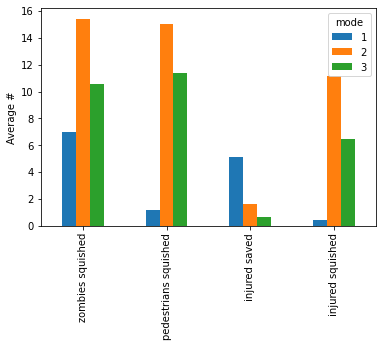

In [9]:
import matplotlib.pyplot as plt
mode_avgs2 = mode_avgs.drop(columns=['total reward'])
h_flipped = mode_avgs2.transpose()
h_graph = h_flipped.plot.bar()
h_graph.set(ylabel="Average #")
h_graph

## Machine Gameplay Data
loading in machine data into df

In [10]:
m_df = pd.read_json('m_data_log.json', lines=True)

m_df.head()

,game_id,turn,squish/save data
0,cdd8fea9-573e-46f6-b4ea-2e04b7e63128,0,"{'mode': 1, 'total_reward': 0, 'zombies_squish..."
1,cdd8fea9-573e-46f6-b4ea-2e04b7e63128,1,"{'mode': 1, 'total_reward': 0, 'zombies_squish..."
2,cdd8fea9-573e-46f6-b4ea-2e04b7e63128,2,"{'mode': 1, 'total_reward': -10, 'zombies_squi..."
3,cdd8fea9-573e-46f6-b4ea-2e04b7e63128,3,"{'mode': 1, 'total_reward': -10, 'zombies_squi..."
4,cdd8fea9-573e-46f6-b4ea-2e04b7e63128,4,"{'mode': 1, 'total_reward': -10, 'zombies_squi..."


tells you the last row (#) logged for that game
(aka the only info we care abt)

In [11]:
m_games = {}
for i, game_id in enumerate(m_df['game_id']):
    m_games[game_id]=i

m_games

{'cdd8fea9-573e-46f6-b4ea-2e04b7e63128': 85,
 '7faa849f-9e83-470c-a03c-8d62cca98ae7': 175,
 '1afffe98-16a5-43af-acf3-afbcf047d0aa': 265,
 '18b1eafd-dcd5-4d0a-a891-349efea5a1aa': 345,
 '8a2e162c-290e-4a8a-ba6b-fbf7b92eab57': 435,
 '6d191194-914f-4244-852c-8625f7a46b49': 623,
 '678a3a1f-d25c-428c-b6a1-ad4784f869e9': 693,
 'f986b372-6a0a-46cc-9cb7-9402583d9314': 790,
 '4b7be7fb-1830-4b76-925a-914a886718fc': 840}

- create dict that tells u game info for only last line (found in prev cell)
- key -> game id, value -> dict containing game info

In [12]:
m_game_data = {}
for game_id in m_games:
    m_game_data[game_id] = m_df['squish/save data'][m_games[game_id]]

m_game_data

{'cdd8fea9-573e-46f6-b4ea-2e04b7e63128': {'mode': 1,
  'total_reward': 65,
  'zombies_squished': 5,
  'pedestrians_squished': 1,
  'injured_saved': 3,
  'injured_squished': 0},
 '7faa849f-9e83-470c-a03c-8d62cca98ae7': {'mode': 1,
  'total_reward': 51,
  'zombies_squished': 6,
  'pedestrians_squished': 0,
  'injured_saved': 1,
  'injured_squished': 0},
 '1afffe98-16a5-43af-acf3-afbcf047d0aa': {'mode': 1,
  'total_reward': 77,
  'zombies_squished': 2,
  'pedestrians_squished': 1,
  'injured_saved': 5,
  'injured_squished': 0},
 '18b1eafd-dcd5-4d0a-a891-349efea5a1aa': {'mode': 2,
  'total_reward': 120,
  'zombies_squished': 7,
  'pedestrians_squished': 2,
  'injured_saved': 2,
  'injured_squished': 1},
 '8a2e162c-290e-4a8a-ba6b-fbf7b92eab57': {'mode': 2,
  'total_reward': 190,
  'zombies_squished': 9,
  'pedestrians_squished': 5,
  'injured_saved': 1,
  'injured_squished': 4},
 '6d191194-914f-4244-852c-8625f7a46b49': {'mode': 2,
  'total_reward': 460,
  'zombies_squished': 21,
  'pedestri

- make df showing scores + save/squish data for each game id (using dict from prev cell)
- if u wanna flip orientation (game id as cols) remove orient='index' (default is cols)

In [13]:
m_df_new = pd.DataFrame.from_dict(m_game_data, orient='index')
m_df_new

,mode,total_reward,zombies_squished,pedestrians_squished,injured_saved,injured_squished
cdd8fea9-573e-46f6-b4ea-2e04b7e63128,1,65,5,1,3,0
7faa849f-9e83-470c-a03c-8d62cca98ae7,1,51,6,0,1,0
1afffe98-16a5-43af-acf3-afbcf047d0aa,1,77,2,1,5,0
18b1eafd-dcd5-4d0a-a891-349efea5a1aa,2,120,7,2,2,1
8a2e162c-290e-4a8a-ba6b-fbf7b92eab57,2,190,9,5,1,4
6d191194-914f-4244-852c-8625f7a46b49,2,460,21,9,3,13
678a3a1f-d25c-428c-b6a1-ad4784f869e9,3,90,3,6,1,4
f986b372-6a0a-46cc-9cb7-9402583d9314,3,80,4,5,2,4
4b7be7fb-1830-4b76-925a-914a886718fc,3,85,3,7,0,0


calculate averages for each column

In [14]:
m_avgs = m_df_new[['total_reward', 'zombies_squished', 'pedestrians_squished', 'injured_saved', 'injured_squished']].mean()
m_avgs

total_reward            135.333333
zombies_squished          6.666667
pedestrians_squished      4.000000
injured_saved             2.000000
injured_squished          2.888889
dtype: float64

some notes abt where to go from here:
- create this type of table for each player, calculate their avgs, then maybe plot that data comparing all dif players
- group by modes and compare across dif game modes

In [15]:
m_grouped = m_df_new.groupby('mode')

m_mode_avgs = m_grouped.mean()
m_mode_avgs.columns = m_mode_avgs.columns.str.replace('_', ' ')
m_mode_avgs

,total reward,zombies squished,pedestrians squished,injured saved,injured squished
mode,,,,,
1,64.333333,4.333333,0.666667,3.0,0.000000
2,256.666667,12.333333,5.333333,2.0,6.000000
3,85.000000,3.333333,6.000000,1.0,2.666667


- remove total reward column for plotting (scaling issue)
- flip cols and rows of df (so we get modes in legend)
- plot as bar graph!

<AxesSubplot:ylabel='Average #'>

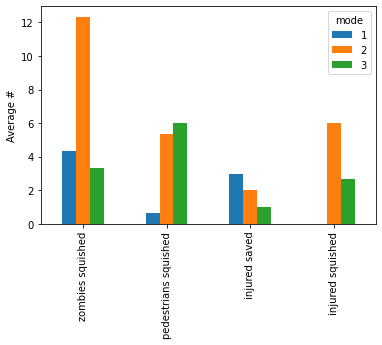

In [16]:
m_mode_avgs2 = m_mode_avgs.drop(columns=['total reward'])
m_flipped = m_mode_avgs2.transpose()
m_graph = m_flipped.plot.bar()
m_graph.set(ylabel="Average #")
m_graph